In [3]:
!pip install mlxtend
!pip install imbalanced-learn
!pip install itables
!pip install xgboost

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
import mlxtend
import sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/Machine_learning_Tahlildadeh"


from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

df = pd.read_csv(f'{data_path}/Airdata.csv')
df.shape

Mounted at /content/drive


(8784, 8)

In [5]:
df

DateTime  Temperature  Humidity  Wind_Speed  Wind_Direction  \
0        1/1/2020 0:00     2.180529        87    1.484318       75.963760   
1        1/1/2020 1:00     1.490529        89    2.741678      113.198590   
2        1/1/2020 2:00     1.690529        85    3.563818      135.000000   
3        1/1/2020 3:00     1.430529        84    2.811690      129.805570   
4        1/1/2020 4:00     0.840529        86    1.800000      126.869896   
...                ...          ...       ...         ...             ...   
8779  12/31/2020 19:00     4.920528        72    4.553680      251.565060   
8780  12/31/2020 20:00     4.990529        74    3.259939      186.340200   
8781  12/31/2020 21:00     4.360529        84   10.587917      252.181120   
8782  12/31/2020 22:00     3.820528        88    8.435069      219.805570   
8783  12/31/2020 23:00     3.170529        89    6.792466      212.005390   

      NO2_Location_A  NO2_Location_B  NO2_Location_C  
0              39.23           52.88           62.37  
1              38.30           44.95           52.53  
2                NaN           48.40           54.80  
3              37.28           47.18           50.80  
4              29.97           41.48           54.43  
...              ...             ...             ...  
8779           53.44           32.65           66.82  
8780           49.80           34.03           67.31  
8781           43.32           25.55           59.33  
8782           39.88           19.90           43.70  
8783           39.04           30.33           46.87  

[8784 rows x 8 columns]

In [6]:
df.shape

(8784, 8)

In [7]:
df.isna()

DateTime  Temperature  Humidity  Wind_Speed  Wind_Direction  \
0        False        False     False       False           False   
1        False        False     False       False           False   
2        False        False     False       False           False   
3        False        False     False       False           False   
4        False        False     False       False           False   
...        ...          ...       ...         ...             ...   
8779     False        False     False       False           False   
8780     False        False     False       False           False   
8781     False        False     False       False           False   
8782     False        False     False       False           False   
8783     False        False     False       False           False   

      NO2_Location_A  NO2_Location_B  NO2_Location_C  
0              False           False           False  
1              False           False           False  
2               True           False           False  
3              False           False           False  
4              False           False           False  
...              ...             ...             ...  
8779           False           False           False  
8780           False           False           False  
8781           False           False           False  
8782           False           False           False  
8783           False           False           False  

[8784 rows x 8 columns]

In [8]:
df.isna().sum()

DateTime            0
Temperature         0
Humidity            0
Wind_Speed          0
Wind_Direction      0
NO2_Location_A    120
NO2_Location_B    580
NO2_Location_C    132
dtype: int64

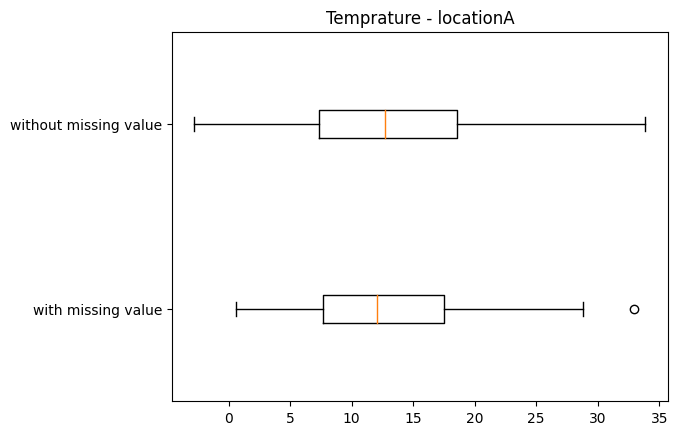

In [9]:
box_sr = pd.Series({
    'with missing value':df[df['NO2_Location_A'].isna()]['Temperature'],
    'without missing value':df[~df['NO2_Location_A'].isna()]['Temperature'],
})
plt.boxplot(box_sr, vert= False)
plt.yticks([1,2],['with missing value', 'without missing value'])
plt.title('Temprature - locationA')
plt.show()

In [10]:
from scipy.stats import ttest_ind
ttest_ind(df[df['NO2_Location_A'].isna()]['Temperature'],df[~df['NO2_Location_A'].isna()]['Temperature'])

TtestResult(statistic=0.05646499065315542, pvalue=0.9549726689684548, df=8782.0)

In [11]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction',
       'NO2_Location_A', 'NO2_Location_B', 'NO2_Location_C'],
      dtype='object')

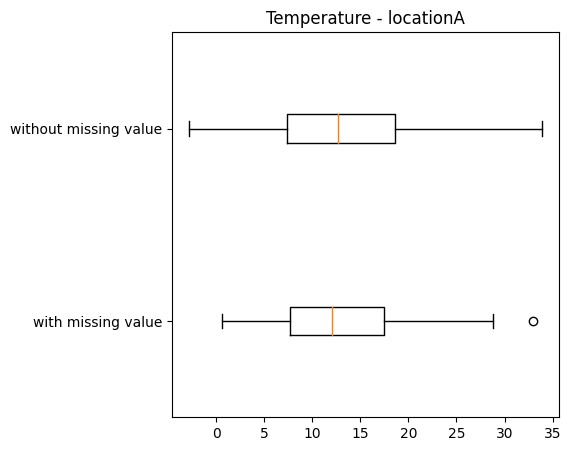

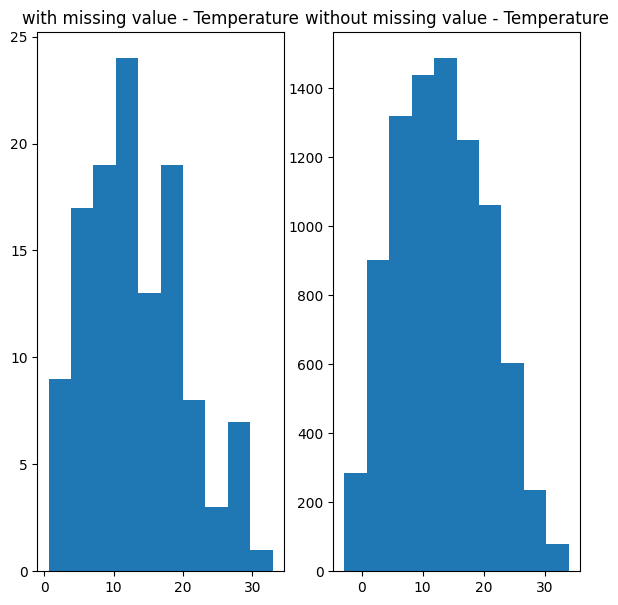

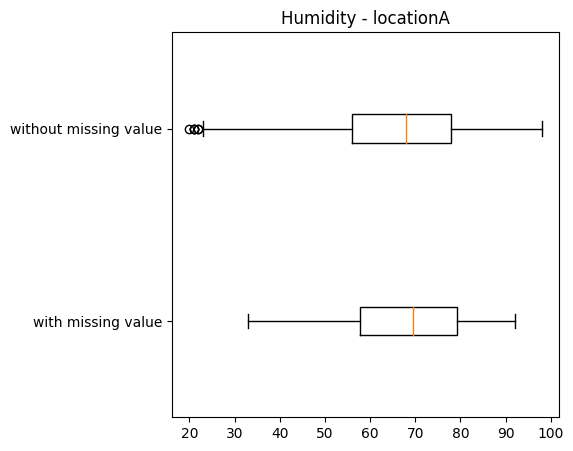

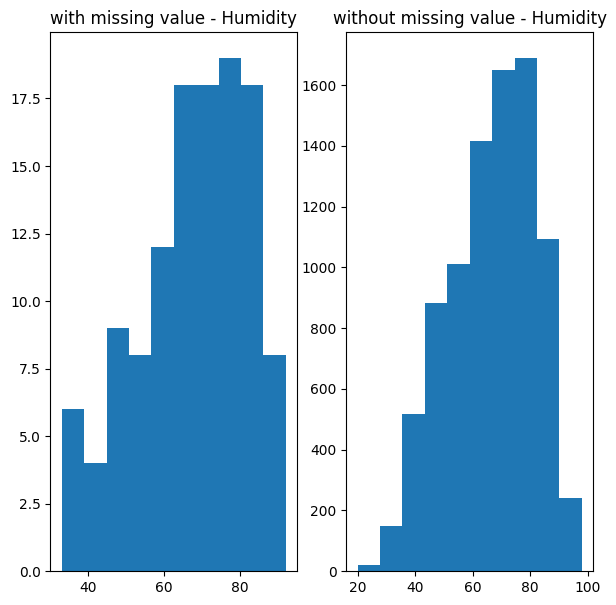

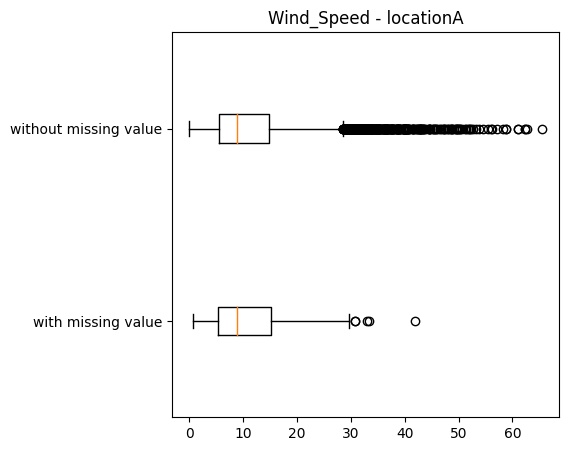

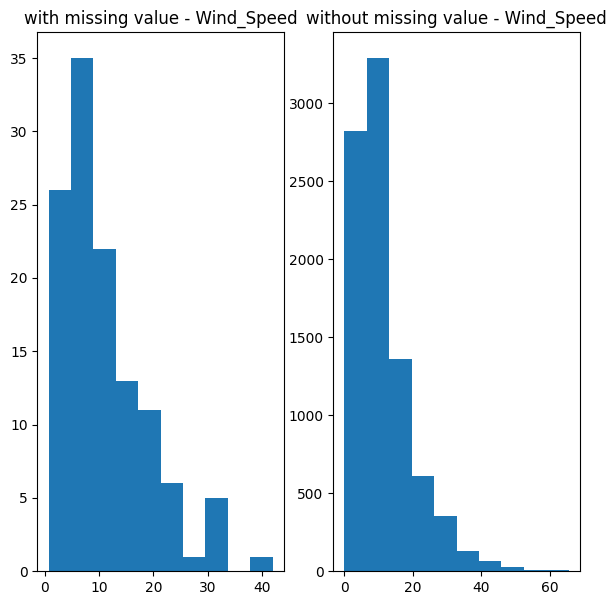

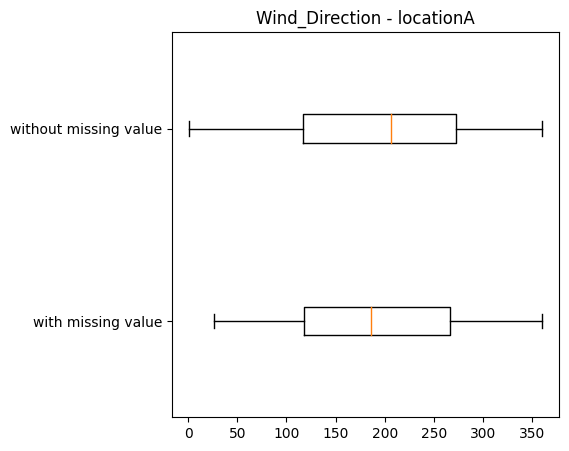

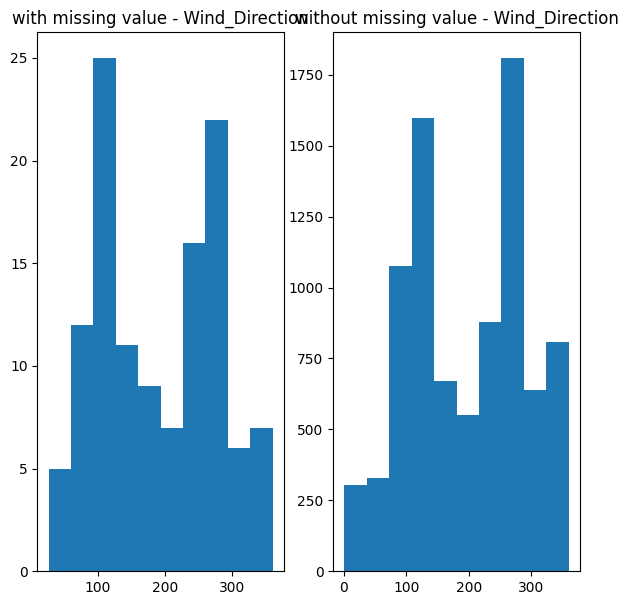

In [12]:
columns = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']
BM = df['NO2_Location_A'].isna()   #Boolean Mask

for column in columns:
    box_sr = pd.Series({
    'with missing value':df[BM][column],
    'without missing value':df[~BM][column],
    })
    plt.figure(figsize = (5,5))
    plt.boxplot(box_sr, vert= False)
    plt.yticks([1,2],['with missing value', 'without missing value'])
    plt.title(f'{column} - locationA')
    plt.show()
    print('\n\n')
    plt.figure(figsize = (7,7))
    plt.subplot(1,2,1)
    plt.hist(df[BM][column])
    plt.title(f'with missing value - {column}')
    plt.subplot(1,2,2)
    plt.hist(df[~BM][column])
    plt.title(f'without missing value - {column}')
    plt.show()

In [13]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.head()

DateTime  Temperature  Humidity  Wind_Speed  Wind_Direction  \
0 2020-01-01 00:00:00     2.180529        87    1.484318       75.963760   
1 2020-01-01 01:00:00     1.490529        89    2.741678      113.198590   
2 2020-01-01 02:00:00     1.690529        85    3.563818      135.000000   
3 2020-01-01 03:00:00     1.430529        84    2.811690      129.805570   
4 2020-01-01 04:00:00     0.840529        86    1.800000      126.869896   

   NO2_Location_A  NO2_Location_B  NO2_Location_C  
0           39.23           52.88           62.37  
1           38.30           44.95           52.53  
2             NaN           48.40           54.80  
3           37.28           47.18           50.80  
4           29.97           41.48           54.43

In [14]:
df['month'] = df.DateTime.dt.month
df['day'] = df.DateTime.dt.day
df['hour'] = df.DateTime.dt.hour
df['weekday'] = df.DateTime.dt.day_name()
df.head()

DateTime  Temperature  Humidity  Wind_Speed  Wind_Direction  \
0 2020-01-01 00:00:00     2.180529        87    1.484318       75.963760   
1 2020-01-01 01:00:00     1.490529        89    2.741678      113.198590   
2 2020-01-01 02:00:00     1.690529        85    3.563818      135.000000   
3 2020-01-01 03:00:00     1.430529        84    2.811690      129.805570   
4 2020-01-01 04:00:00     0.840529        86    1.800000      126.869896   

   NO2_Location_A  NO2_Location_B  NO2_Location_C  month  day  hour    weekday  
0           39.23           52.88           62.37      1    1     0  Wednesday  
1           38.30           44.95           52.53      1    1     1  Wednesday  
2             NaN           48.40           54.80      1    1     2  Wednesday  
3           37.28           47.18           50.80      1    1     3  Wednesday  
4           29.97           41.48           54.43      1    1     4  Wednesday

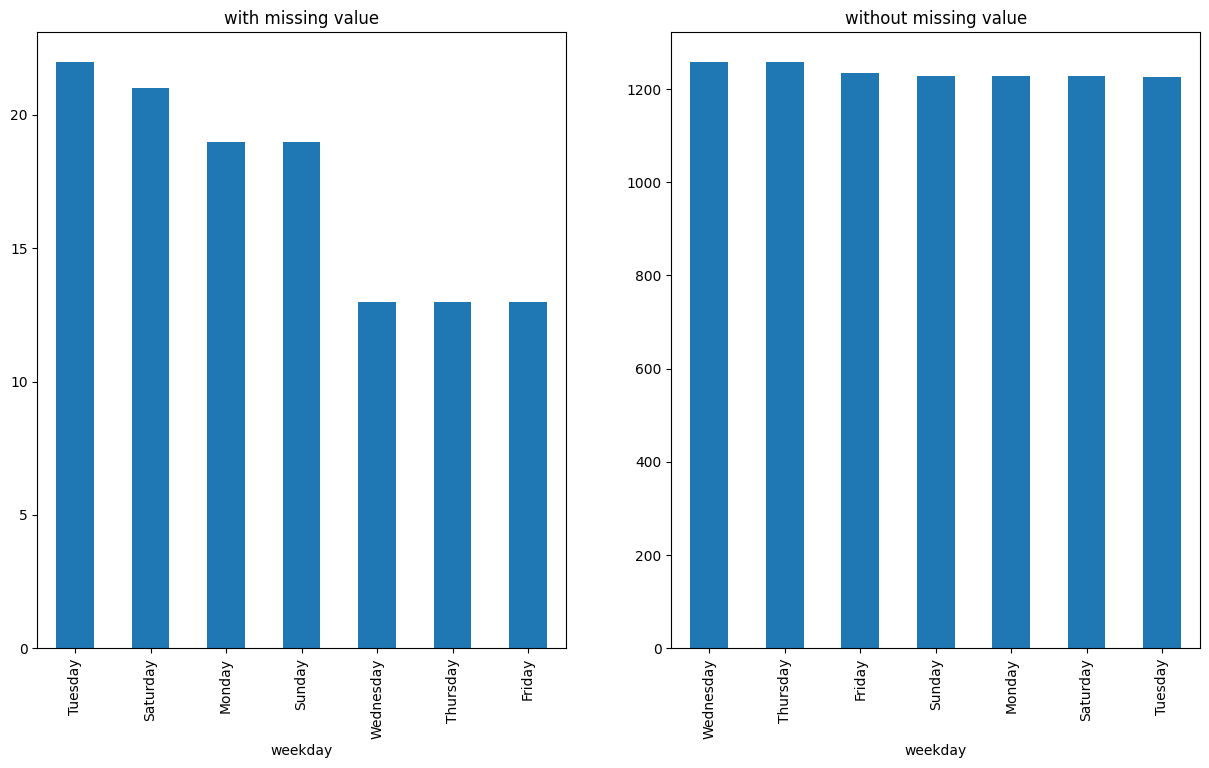

In [15]:
BM = df['NO2_Location_A'].isna()
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df[BM]['weekday'].value_counts().plot.bar()
plt.title('with missing value')
plt.subplot(1,2,2)
df[~BM]['weekday'].value_counts().plot.bar()
plt.title('without missing value')
plt.show()

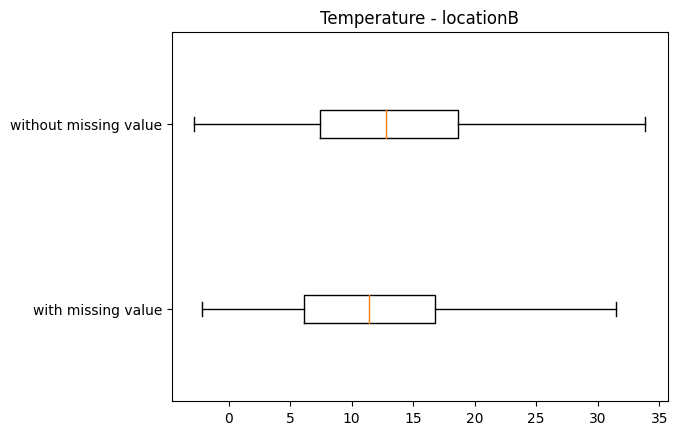

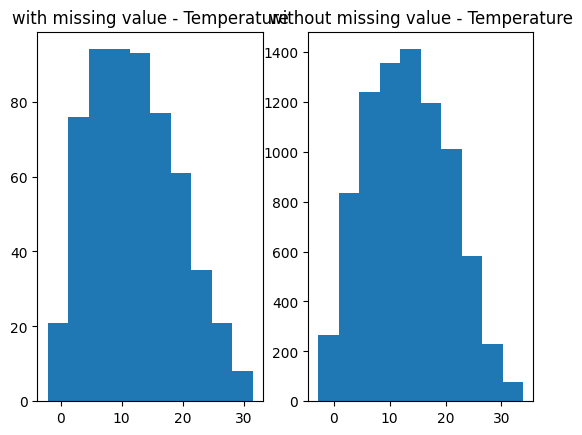

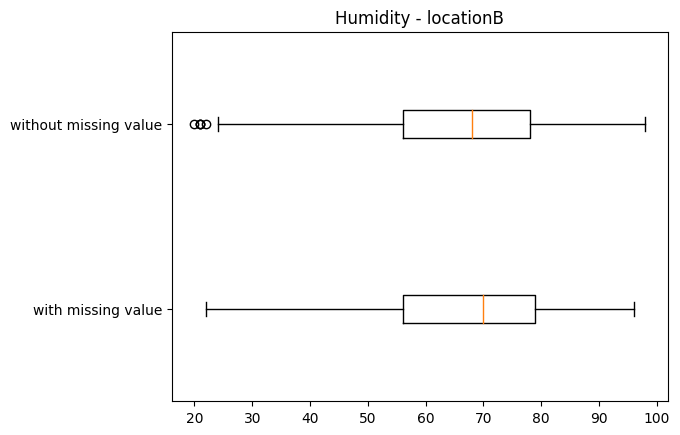

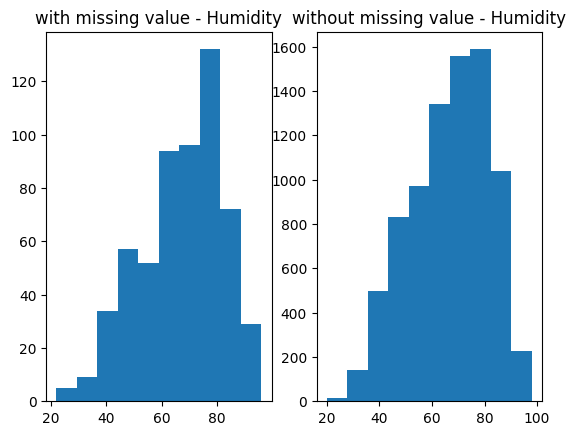

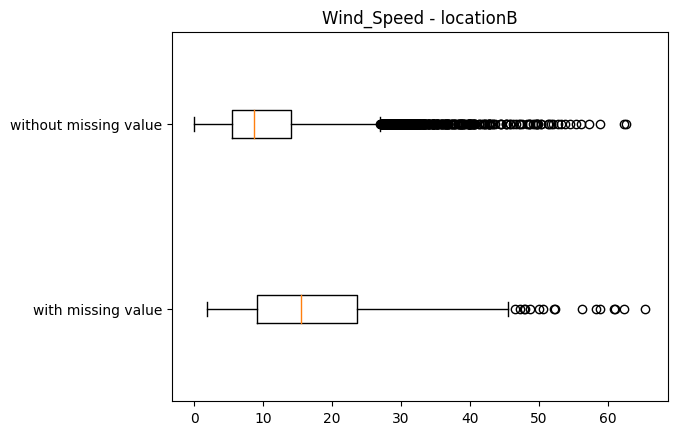

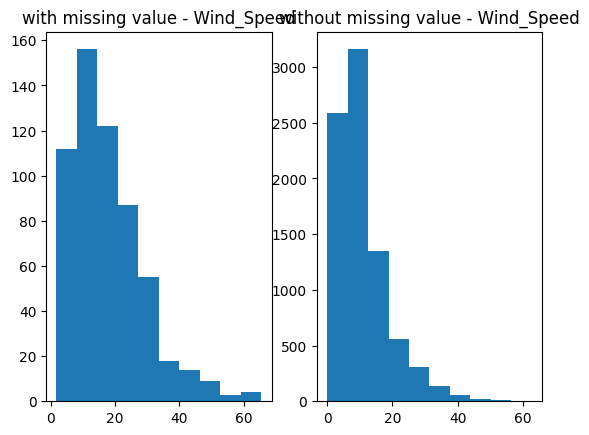

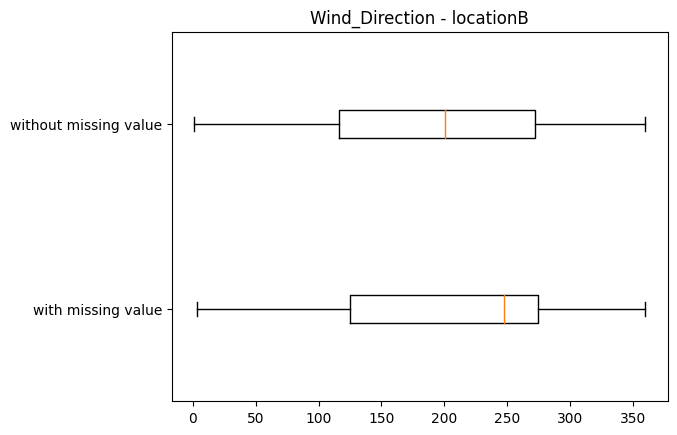

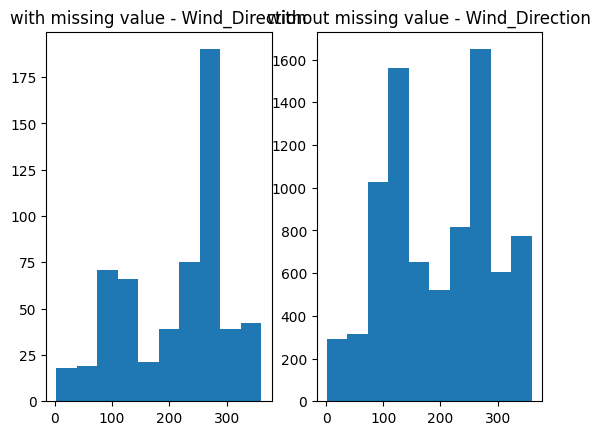

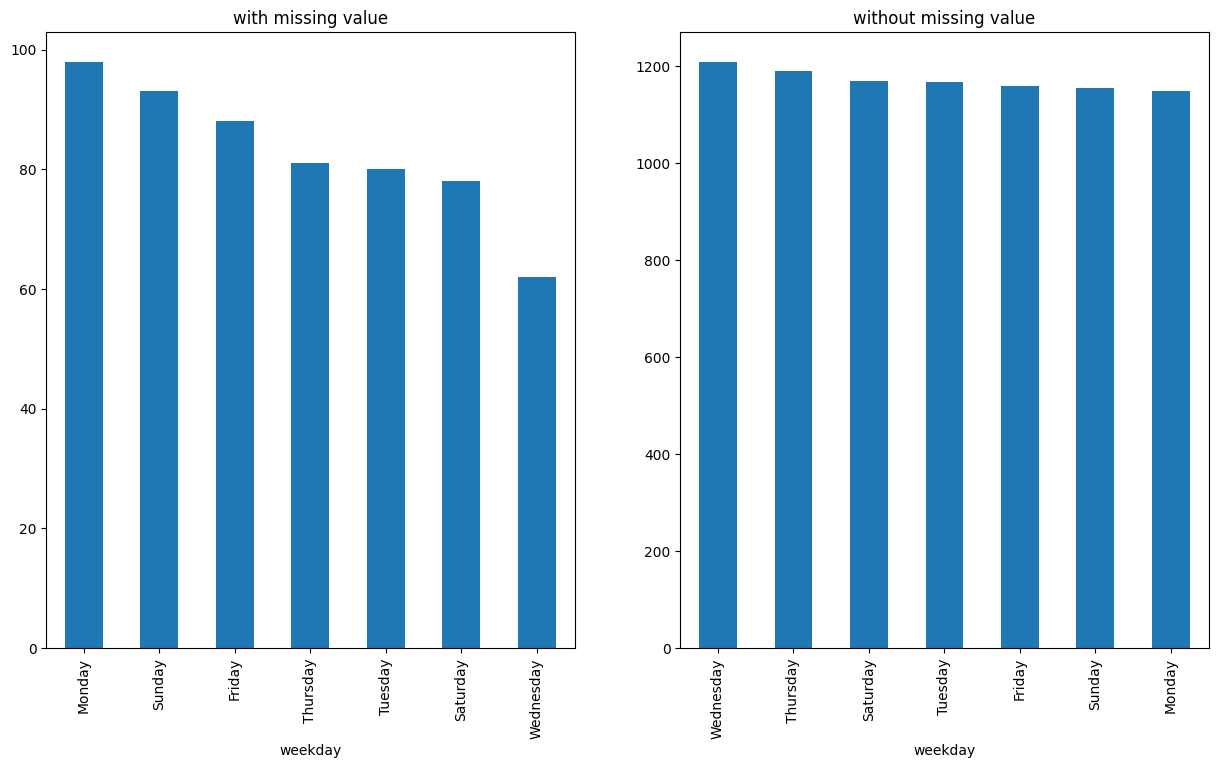

In [16]:
columns = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']
BM = df['NO2_Location_B'].isna()
for column in columns:
    box_sr = pd.Series({
    'with missing value':df[BM][column],
    'without missing value':df[~BM][column],
    })
    plt.boxplot(box_sr, vert= False)
    plt.yticks([1,2],['with missing value', 'without missing value'])
    plt.title(f'{column} - locationB')
    plt.show()
    plt.subplot(1,2,1)
    plt.hist(df[BM][column])
    plt.title(f'with missing value - {column}')
    plt.subplot(1,2,2)
    plt.hist(df[~BM][column])
    plt.title(f'without missing value - {column}')
    plt.show()

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df[BM]['weekday'].value_counts().plot.bar()
plt.title('with missing value')
plt.subplot(1,2,2)
df[~BM]['weekday'].value_counts().plot.bar()
plt.title('without missing value')
plt.show()

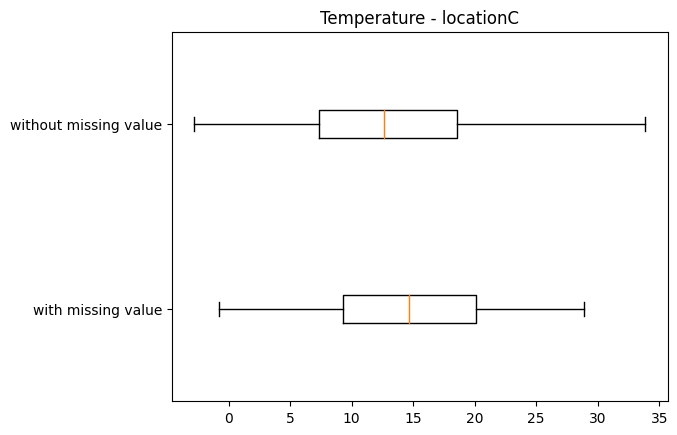

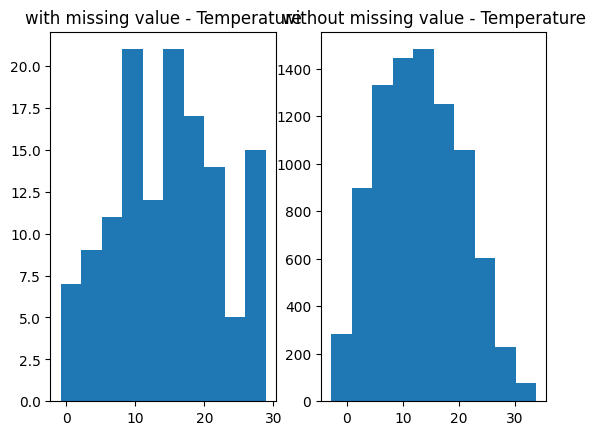

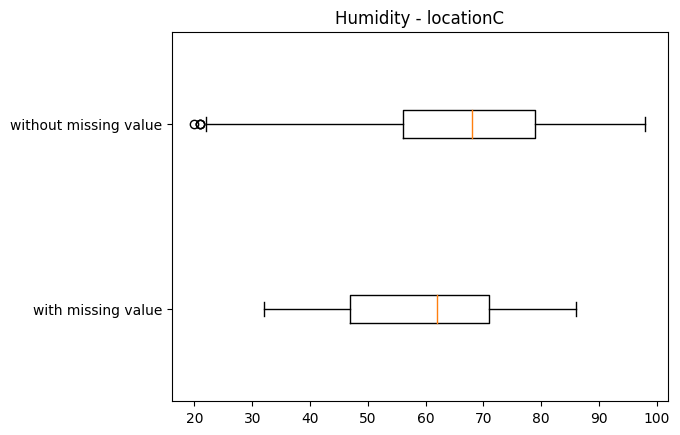

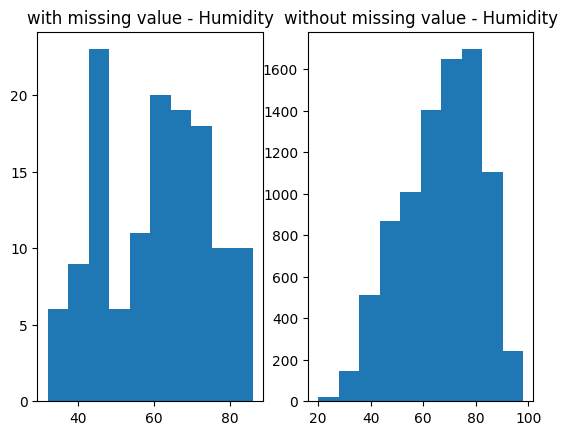

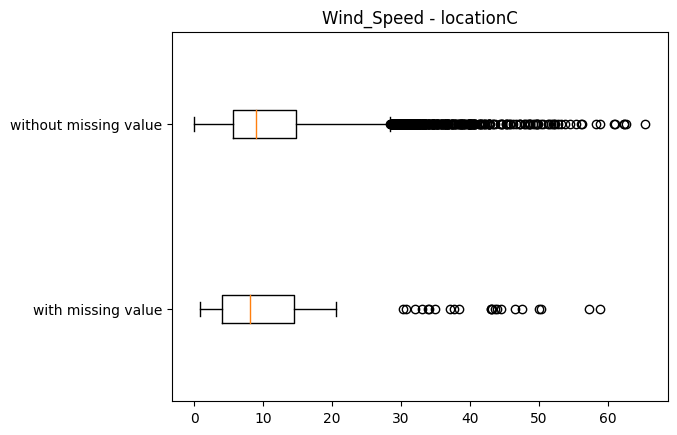

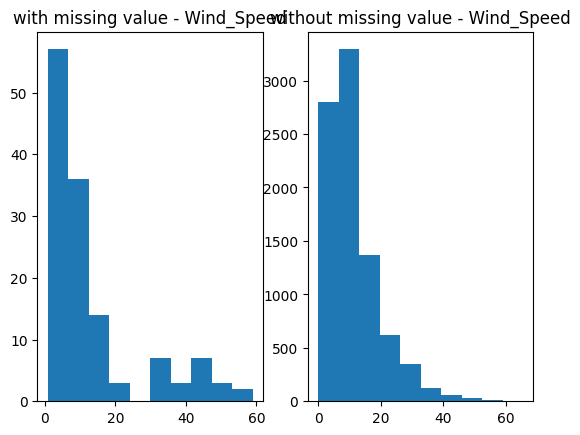

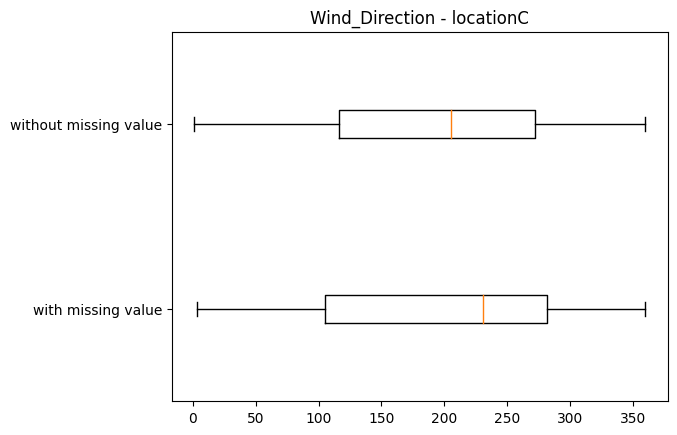

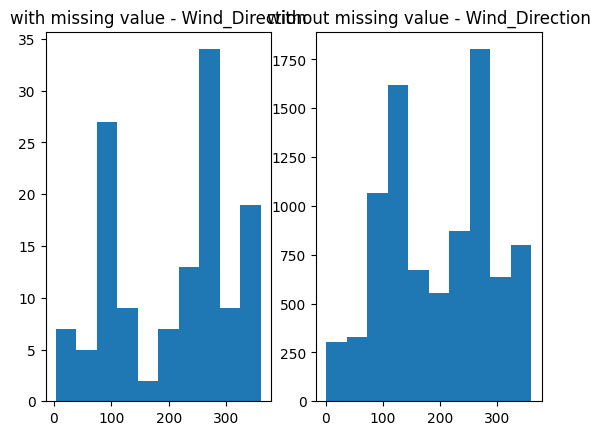

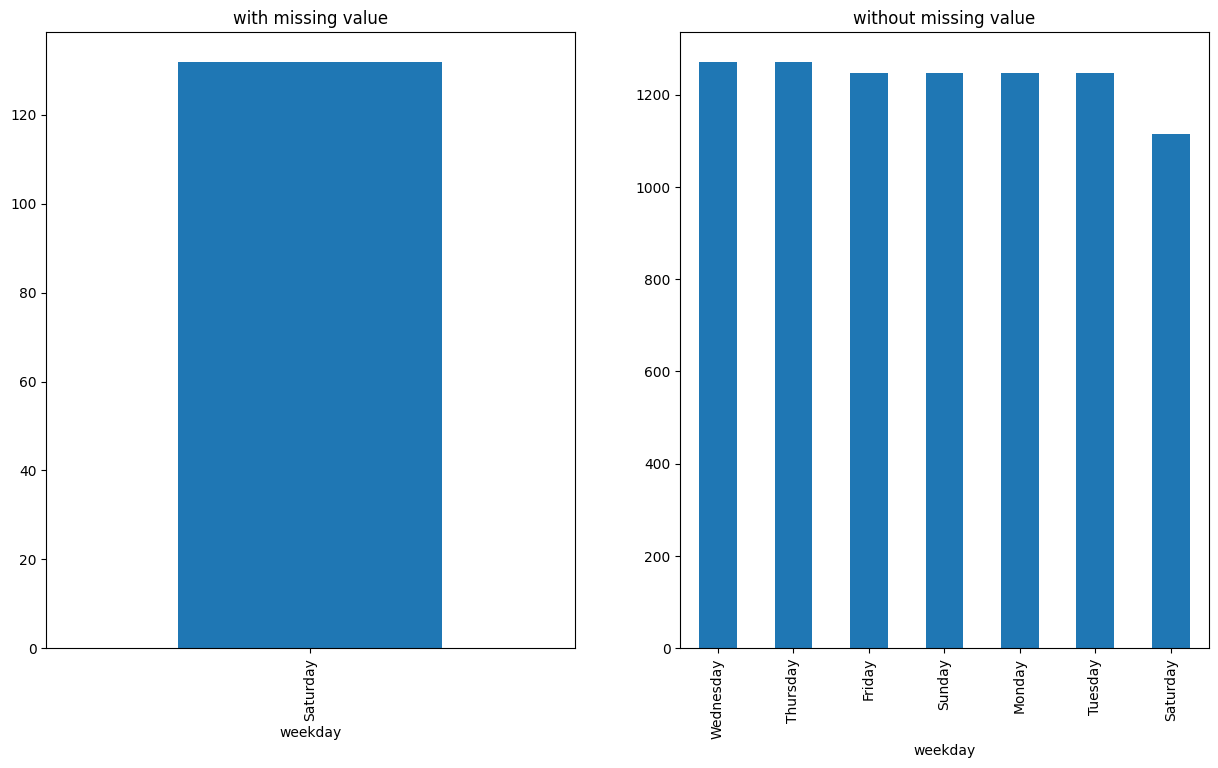

In [17]:
columns = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']
BM = df['NO2_Location_C'].isna()
for column in columns:
    box_sr = pd.Series({
    'with missing value':df[BM][column],
    'without missing value':df[~BM][column],
    })
    plt.boxplot(box_sr, vert= False)
    plt.yticks([1,2],['with missing value', 'without missing value'])
    plt.title(f'{column} - locationC')
    plt.show()
    plt.subplot(1,2,1)
    plt.hist(df[BM][column])
    plt.title(f'with missing value - {column}')
    plt.subplot(1,2,2)
    plt.hist(df[~BM][column])
    plt.title(f'without missing value - {column}')
    plt.show()

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df[BM]['weekday'].value_counts().plot.bar()
plt.title('with missing value')
plt.subplot(1,2,2)
df[~BM]['weekday'].value_counts().plot.bar()
plt.title('without missing value')
plt.show()

In [18]:
from scipy.stats import ttest_ind
ttest_ind(df[BM]['Temperature'],df[~BM]['Temperature'])

TtestResult(statistic=2.3301807752513306, pvalue=0.01981913552818646, df=8782.0)

In [19]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)


home = pd.read_csv(f'{data_path}/HomeDatasetTehran_R4_2.txt', sep='\t')
home.head()


h_type        date                        adress  loc  num_floor  \
0  آپارتمان  1402/06/06     تهرانپارس بین رشید و زرین    4          5   
1  آپارتمان  1402/06/08             تهرانپارس خ استخر    4          5   
2  آپارتمان  1402/06/13        خواجه عبدالله ك یازدهم    4          4   
3  آپارتمان  1402/05/28  تهران پارس بلوار پروین خ 218    4          5   
4  آپارتمان  1402/06/08               هنگام شمیران نو    4          5   

  unit_per_floor                 price age statuse view  ... num_sleep  tel  \
0              2   8,380,000,000 تومان  12   تخلیه  سنگ  ...         2    1   
1              3   8,700,000,000 تومان  11  مسکونی  سنگ  ...         2    1   
2              2  10,500,000,000 تومان  30   اجاره  آجر  ...         2    1   
3              3   5,200,000,000 تومان  11  مسکونی  سنگ  ...         2    1   
4              2   9,100,000,000 تومان   4  مسکونی  سنگ  ...         3    1   

   kitch       service  floor_covering open  parking  warehouse  balcony  \
0    MDF  ايراني فرنگي           پارکت    1        0          1        1   
1    MDF        ايرانی          سراميک    1        1          1        1   
2    MDF  ايراني فرنگي          سراميک    1        1          1        0   
3    MDF        ايرانی          سراميک    1        0          1        0   
4    MDF        ايرانی          سراميک    1        1          0        0   

                equipment  
0  شوفاژ_کولر_آسانسور_گاز  
1  شوفاژ_کولر_آسانسور_گاز  
2          شوفاژ_کولر_گاز  
3  شوفاژ_کولر_آسانسور_گاز  
4  شوفاژ_کولر_آسانسور_گاز  

[5 rows x 27 columns]

In [20]:
home.shape

(963, 27)

In [21]:
########################################################### Outlier Data

In [22]:
df = pd.read_csv(f'{data_path}/responses.csv')
df

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0       5.0                       3.0    2.0   1.0      2.0              2.0   
1       4.0                       4.0    2.0   1.0      1.0              1.0   
2       5.0                       5.0    2.0   2.0      3.0              4.0   
3       5.0                       3.0    2.0   1.0      1.0              1.0   
4       5.0                       3.0    4.0   3.0      2.0              4.0   
...     ...                       ...    ...   ...      ...              ...   
1005    5.0                       2.0    5.0   2.0      2.0              5.0   
1006    4.0                       4.0    5.0   1.0      3.0              4.0   
1007    4.0                       3.0    1.0   1.0      2.0              2.0   
1008    5.0                       3.0    3.0   3.0      1.0              3.0   
1009    5.0                       5.0    4.0   3.0      2.0              3.0   

      Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
0         1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1         2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2         5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3         1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4         3.0  5.0   3.0                1.0  ...  20.0   170.0    59.0   
...       ...  ...   ...                ...  ...   ...     ...     ...   
1005      4.0  4.0   4.0                3.0  ...  20.0   164.0    57.0   
1006      1.0  4.0   1.0                1.0  ...  27.0   183.0    80.0   
1007      2.0  3.0   4.0                1.0  ...  18.0   173.0    75.0   
1008      1.0  3.0   4.0                1.0  ...  25.0   173.0    58.0   
1009      3.0  4.0   1.0                1.0  ...  21.0   185.0    72.0   

      Number of siblings  Gender  Left - right handed  \
0                    1.0  female         right handed   
1                    2.0  female         right handed   
2                    2.0  female         right handed   
3                    1.0  female         right handed   
4                    1.0  female         right handed   
...                  ...     ...                  ...   
1005                 1.0  female         right handed   
1006                 5.0    male          left handed   
1007                 0.0  female         right handed   
1008                 1.0  female         right handed   
1009                 1.0    male         right handed   

                    Education  Only child  Village - town  \
0     college/bachelor degree          no         village   
1     college/bachelor degree          no            city   
2            secondary school          no            city   
3     college/bachelor degree         yes            city   
4            secondary school          no         village   
...                       ...         ...             ...   
1005         secondary school          no            city   
1006           masters degree          no         village   
1007         secondary school         yes            city   
1008  college/bachelor degree          no            city   
1009         secondary school          no         village   

      House - block of flats  
0             block of flats  
1             block of flats  
2             block of flats  
3             house/bungalow  
4             house/bungalow  
...                      ...  
1005          house/bungalow  
1006          house/bungalow  
1007          block of flats  
1008          block of flats  
1009          house/bungalow  

[1010 rows x 150 columns]

In [23]:
df.shape

(1010, 150)

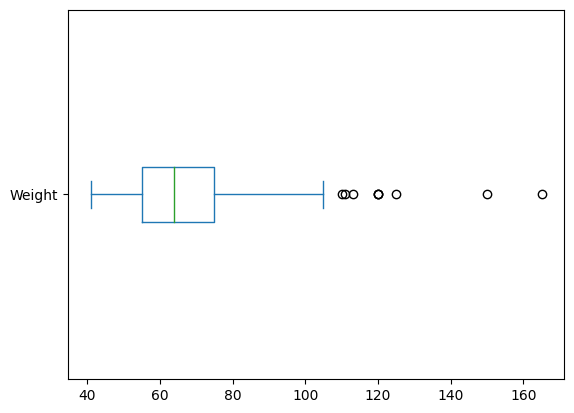

In [24]:
df['Weight'].plot.box(vert = False)
plt.show()

In [25]:
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1
upper_cap = Q3 + 1.5 * IQR
lower_cap = Q1 - 1.5 * IQR
BM = (df['Weight'] > upper_cap) | (df['Weight'] < lower_cap)
df[BM]

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
292    5.0                       4.0    5.0   2.0      3.0              2.0   
612    5.0                       3.0    5.0   1.0      1.0              3.0   
715    4.0                       3.0    2.0   3.0      3.0              3.0   
793    2.0                       3.0    3.0   1.0      2.0              3.0   
796    3.0                       5.0    3.0   2.0      2.0              4.0   
859    5.0                       3.0    4.0   4.0      2.0              3.0   
885    3.0                       4.0    3.0   2.0      2.0              2.0   
973    5.0                       3.0    2.0   5.0      5.0              4.0   
992    4.0                       4.0    4.0   1.0      4.0              4.0   

     Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
292      5.0  5.0   4.0                1.0  ...  21.0   184.0   120.0   
612      2.0  3.0   4.0                3.0  ...  23.0   172.0   110.0   
715      4.0  2.0   5.0                5.0  ...  29.0   183.0   111.0   
793      3.0  3.0   2.0                4.0  ...  24.0   185.0   120.0   
796      3.0  5.0   1.0                4.0  ...  27.0   189.0   113.0   
859      3.0  4.0   3.0                2.0  ...  20.0   190.0   125.0   
885      3.0  4.0   4.0                4.0  ...  23.0     NaN   165.0   
973      5.0  2.0   5.0                5.0  ...  20.0   175.0   120.0   
992      1.0  3.0   4.0                4.0  ...  30.0   200.0   150.0   

     Number of siblings  Gender  Left - right handed         Education  \
292                 1.0  female         right handed  secondary school   
612                 2.0    male         right handed  secondary school   
715                 1.0    male          left handed  secondary school   
793                 2.0    male         right handed  doctorate degree   
796                 3.0    male          left handed  doctorate degree   
859                 1.0    male         right handed  secondary school   
885                 0.0  female         right handed  secondary school   
973                 2.0  female         right handed  secondary school   
992                 1.0    male         right handed    masters degree   

     Only child  Village - town  House - block of flats  
292          no            city          house/bungalow  
612          no         village          block of flats  
715          no         village          house/bungalow  
793          no            city          house/bungalow  
796          no            city          house/bungalow  
859          no            city          block of flats  
885         yes            city          house/bungalow  
973          no            city          block of flats  
992          no            city          block of flats  

[9 rows x 150 columns]

In [26]:
lower_cap,upper_cap

(25.0, 105.0)

In [27]:
cf = df[~BM]
cf

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0       5.0                       3.0    2.0   1.0      2.0              2.0   
1       4.0                       4.0    2.0   1.0      1.0              1.0   
2       5.0                       5.0    2.0   2.0      3.0              4.0   
3       5.0                       3.0    2.0   1.0      1.0              1.0   
4       5.0                       3.0    4.0   3.0      2.0              4.0   
...     ...                       ...    ...   ...      ...              ...   
1005    5.0                       2.0    5.0   2.0      2.0              5.0   
1006    4.0                       4.0    5.0   1.0      3.0              4.0   
1007    4.0                       3.0    1.0   1.0      2.0              2.0   
1008    5.0                       3.0    3.0   3.0      1.0              3.0   
1009    5.0                       5.0    4.0   3.0      2.0              3.0   

      Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
0         1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1         2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2         5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3         1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4         3.0  5.0   3.0                1.0  ...  20.0   170.0    59.0   
...       ...  ...   ...                ...  ...   ...     ...     ...   
1005      4.0  4.0   4.0                3.0  ...  20.0   164.0    57.0   
1006      1.0  4.0   1.0                1.0  ...  27.0   183.0    80.0   
1007      2.0  3.0   4.0                1.0  ...  18.0   173.0    75.0   
1008      1.0  3.0   4.0                1.0  ...  25.0   173.0    58.0   
1009      3.0  4.0   1.0                1.0  ...  21.0   185.0    72.0   

      Number of siblings  Gender  Left - right handed  \
0                    1.0  female         right handed   
1                    2.0  female         right handed   
2                    2.0  female         right handed   
3                    1.0  female         right handed   
4                    1.0  female         right handed   
...                  ...     ...                  ...   
1005                 1.0  female         right handed   
1006                 5.0    male          left handed   
1007                 0.0  female         right handed   
1008                 1.0  female         right handed   
1009                 1.0    male         right handed   

                    Education  Only child  Village - town  \
0     college/bachelor degree          no         village   
1     college/bachelor degree          no            city   
2            secondary school          no            city   
3     college/bachelor degree         yes            city   
4            secondary school          no         village   
...                       ...         ...             ...   
1005         secondary school          no            city   
1006           masters degree          no         village   
1007         secondary school         yes            city   
1008  college/bachelor degree          no            city   
1009         secondary school          no         village   

      House - block of flats  
0             block of flats  
1             block of flats  
2             block of flats  
3             house/bungalow  
4             house/bungalow  
...                      ...  
1005          house/bungalow  
1006          house/bungalow  
1007          block of flats  
1008          block of flats  
1009          house/bungalow  

[1001 rows x 150 columns]

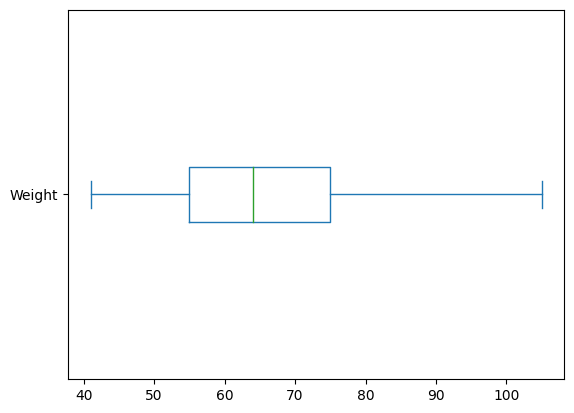

In [28]:
cf['Weight'].plot.box(vert = False)
plt.show()

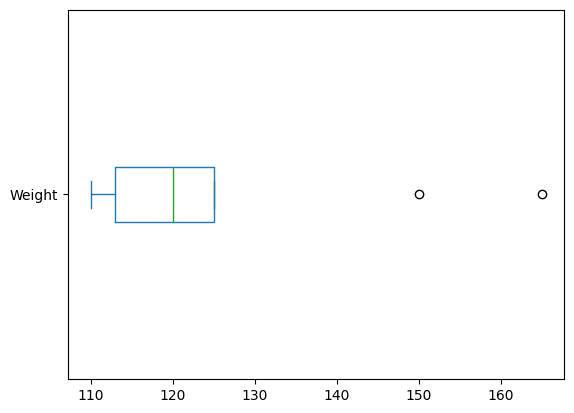

In [29]:
mf = df[BM]
mf['Weight'].plot.box(vert = False)
plt.show()

<Axes: xlabel='Education'>

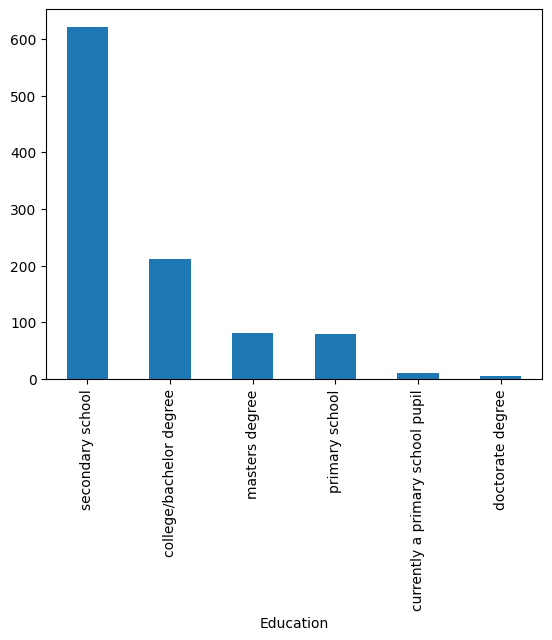

In [30]:
df['Education'].value_counts().plot.bar()

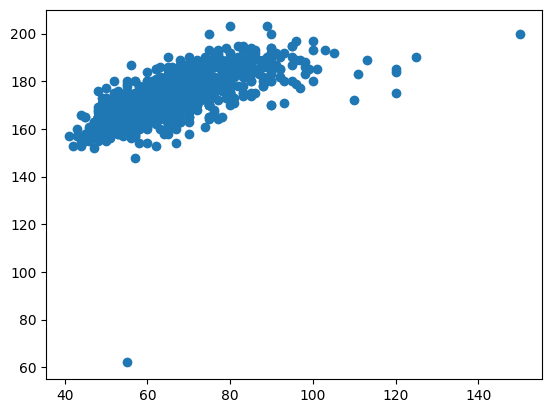

In [31]:
plt.scatter(df['Weight'],df['Height'])
plt.show()

In [32]:
BM = (df['Weight'] > 140) & (df['Height'] > 180)
df[BM]

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
992    4.0                       4.0    4.0   1.0      4.0              4.0   

     Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
992      1.0  3.0   4.0                4.0  ...  30.0   200.0   150.0   

     Number of siblings  Gender  Left - right handed       Education  \
992                 1.0    male         right handed  masters degree   

     Only child  Village - town  House - block of flats  
992          no            city          block of flats  

[1 rows x 150 columns]

In [33]:
df.head()

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
0      1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1      2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2      5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3      1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4      3.0  5.0   3.0                1.0  ...  20.0   170.0    59.0   

   Number of siblings  Gender  Left - right handed                Education  \
0                 1.0  female         right handed  college/bachelor degree   
1                 2.0  female         right handed  college/bachelor degree   
2                 2.0  female         right handed         secondary school   
3                 1.0  female         right handed  college/bachelor degree   
4                 1.0  female         right handed         secondary school   

   Only child  Village - town  House - block of flats  
0          no         village          block of flats  
1          no            city          block of flats  
2          no            city          block of flats  
3         yes            city          house/bungalow  
4          no         village          house/bungalow  

[5 rows x 150 columns]

In [34]:
count_table = pd.crosstab(df['Education'],df['God'])
count_table

God                               1.0  2.0  3.0  4.0  5.0
Education                                                
college/bachelor degree            48   17   46   42   58
currently a primary school pupil    0    1    2    1    6
doctorate degree                    1    1    1    0    2
masters degree                      8    3   20   15   35
primary school                     12   11   21   15   21
secondary school                  118   89  126   92  195

In [35]:
df.columns

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats'],
      dtype='object', length=150)

In [36]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming df is your dataframe and it already contains the columns 'Education' and 'Village - town'

# Create a contingency table
contingency_table = pd.crosstab(df['Education'], df['Village - town'])
print("Contingency Table:")
print(contingency_table)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Identify cells with significant deviations from expected frequencies
observed = contingency_table.values
deviations = np.abs(observed - expected)
threshold = 1  # Define a threshold for significant deviations
outliers = np.argwhere(deviations > threshold)

print("\nOutlier Cells (Row, Column):")
for outlier in outliers:
    print(f"Education: {contingency_table.index[outlier[0]]}, Village - town: {contingency_table.columns[outlier[1]]}, Deviation: {deviations[outlier[0], outlier[1]]}")



Contingency Table:
Village - town                    city  village
Education                                      
college/bachelor degree            152       60
currently a primary school pupil     5        5
doctorate degree                     4        1
masters degree                      55       25
primary school                      56       23
secondary school                   435      184

Chi-Square Test Results:
Chi2 Statistic: 2.5039659714429727
P-value: 0.775897669835832
Degrees of Freedom: 5
Expected Frequencies:
[[149.13830846  62.86169154]
 [  7.03482587   2.96517413]
 [  3.51741294   1.48258706]
 [ 56.27860697  23.72139303]
 [ 55.57512438  23.42487562]
 [435.45572139 183.54427861]]

Outlier Cells (Row, Column):
Education: college/bachelor degree, Village - town: city, Deviation: 2.861691542288554
Education: college/bachelor degree, Village - town: village, Deviation: 2.861691542288554
Education: currently a primary school pupil, Village - town: city, Deviation: 2.034

<Axes: xlabel='Age', ylabel='Education'>

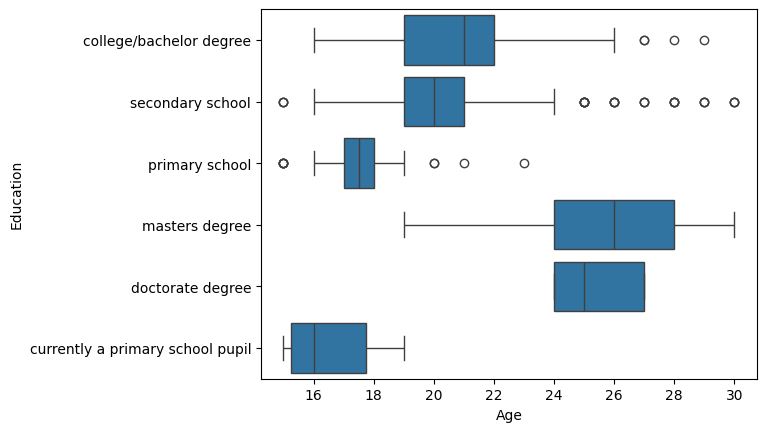

In [37]:
sns.boxplot(x=df['Age'],y=df['Education'])

In [38]:
df = pd.read_csv(f'{data_path}/Airdata.csv')
df.shape

(8784, 8)

In [39]:
df['DateTime'] = pd.to_datetime(df['DateTime'])


In [40]:
import pandas as pd
from sklearn.impute import KNNImputer

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors as needed

# Select the features with missing values
features_with_missing_values = ['NO2_Location_A', 'NO2_Location_B', 'NO2_Location_C']

# Fit and transform the data
imputed_data = imputer.fit_transform(df[features_with_missing_values])

# Create a DataFrame with the imputed values
df_imputed = pd.DataFrame(imputed_data, columns=features_with_missing_values)

# Update the original DataFrame with the imputed values
df[features_with_missing_values] = df_imputed

print("Original DataFrame with Missing Values (Before Imputation):")
print(df)

print("\nDataFrame after KNN Imputation:")
print(df_imputed)



Original DataFrame with Missing Values (Before Imputation):
                DateTime  Temperature  Humidity  Wind_Speed  Wind_Direction  \
0    2020-01-01 00:00:00     2.180529        87    1.484318       75.963760   
1    2020-01-01 01:00:00     1.490529        89    2.741678      113.198590   
2    2020-01-01 02:00:00     1.690529        85    3.563818      135.000000   
3    2020-01-01 03:00:00     1.430529        84    2.811690      129.805570   
4    2020-01-01 04:00:00     0.840529        86    1.800000      126.869896   
...                  ...          ...       ...         ...             ...   
8779 2020-12-31 19:00:00     4.920528        72    4.553680      251.565060   
8780 2020-12-31 20:00:00     4.990529        74    3.259939      186.340200   
8781 2020-12-31 21:00:00     4.360529        84   10.587917      252.181120   
8782 2020-12-31 22:00:00     3.820528        88    8.435069      219.805570   
8783 2020-12-31 23:00:00     3.170529        89    6.792466      212.00

In [41]:
df.isna().sum()

DateTime          0
Temperature       0
Humidity          0
Wind_Speed        0
Wind_Direction    0
NO2_Location_A    0
NO2_Location_B    0
NO2_Location_C    0
dtype: int64

In [42]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction',
       'NO2_Location_A', 'NO2_Location_B', 'NO2_Location_C'],
      dtype='object')

In [43]:
import pandas as pd
import numpy as np

# Function to replace outliers using IQR method
def replace_outliers_iqr(df):
    for column in df.columns:
        if df[column].dtype in [np.float64, np.int64]:  # Only process numeric columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            upper_cap = Q3 + 1.5 * IQR
            lower_cap = Q1 - 1.5 * IQR

            # Replace values
            df[column] = np.where(df[column] > upper_cap, upper_cap, df[column])
            df[column] = np.where(df[column] < lower_cap, lower_cap, df[column])

    return df

# Apply the function
cleaned_data = replace_outliers_iqr(df)

print(cleaned_data)




                DateTime  Temperature  Humidity  Wind_Speed  Wind_Direction  \
0    2020-01-01 00:00:00     2.180529      87.0    1.484318       75.963760   
1    2020-01-01 01:00:00     1.490529      89.0    2.741678      113.198590   
2    2020-01-01 02:00:00     1.690529      85.0    3.563818      135.000000   
3    2020-01-01 03:00:00     1.430529      84.0    2.811690      129.805570   
4    2020-01-01 04:00:00     0.840529      86.0    1.800000      126.869896   
...                  ...          ...       ...         ...             ...   
8779 2020-12-31 19:00:00     4.920528      72.0    4.553680      251.565060   
8780 2020-12-31 20:00:00     4.990529      74.0    3.259939      186.340200   
8781 2020-12-31 21:00:00     4.360529      84.0   10.587917      252.181120   
8782 2020-12-31 22:00:00     3.820528      88.0    8.435069      219.805570   
8783 2020-12-31 23:00:00     3.170529      89.0    6.792466      212.005390   

      NO2_Location_A  NO2_Location_B  NO2_Location_

In [44]:
df = cleaned_data

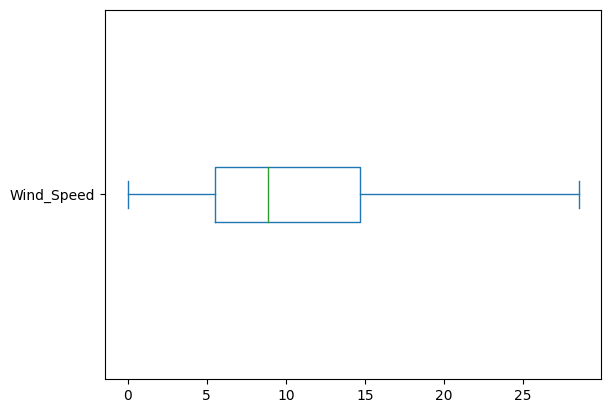

In [45]:
df['Wind_Speed'].plot.box(vert = False)
plt.show()

In [46]:
df.head()


DateTime  Temperature  Humidity  Wind_Speed  Wind_Direction  \
0 2020-01-01 00:00:00     2.180529      87.0    1.484318       75.963760   
1 2020-01-01 01:00:00     1.490529      89.0    2.741678      113.198590   
2 2020-01-01 02:00:00     1.690529      85.0    3.563818      135.000000   
3 2020-01-01 03:00:00     1.430529      84.0    2.811690      129.805570   
4 2020-01-01 04:00:00     0.840529      86.0    1.800000      126.869896   

   NO2_Location_A  NO2_Location_B  NO2_Location_C  
0          39.230           52.88           62.37  
1          38.300           44.95           52.53  
2          44.262           48.40           54.80  
3          37.280           47.18           50.80  
4          29.970           41.48           54.43

In [47]:
df['weekday'] = df.DateTime.dt.day_name()

In [48]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming df['categorical_feature'] is the categorical feature
encoder = OneHotEncoder(sparse=False)
encoded_cats = encoder.fit_transform(df[['weekday']])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(['weekday']))

df = pd.concat([df, encoded_df], axis=1).drop('weekday', axis=1)
test_frame = df
df = df.drop('DateTime', axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Optional: Reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 dimensions if necessary
reduced_features = pca.fit_transform(scaled_features)

# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(reduced_features)
df['outliers'] = db.labels_

# Extract outliers
outliers = df[df['outliers'] == -1]

In [50]:
outliers

Temperature  Humidity  Wind_Speed  Wind_Direction  NO2_Location_A  \
3685    23.660528      44.0    6.989935       11.888657          57.225   

      NO2_Location_B  NO2_Location_C  weekday_Friday  weekday_Monday  \
3685           74.95          112.08             0.0             0.0   

      weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
3685               0.0             0.0               0.0              1.0   

      weekday_Wednesday  outliers  
3685                0.0        -1

In [51]:
df

Temperature  Humidity  Wind_Speed  Wind_Direction  NO2_Location_A  \
0        2.180529      87.0    1.484318       75.963760          39.230   
1        1.490529      89.0    2.741678      113.198590          38.300   
2        1.690529      85.0    3.563818      135.000000          44.262   
3        1.430529      84.0    2.811690      129.805570          37.280   
4        0.840529      86.0    1.800000      126.869896          29.970   
...           ...       ...         ...             ...             ...   
8779     4.920528      72.0    4.553680      251.565060          53.440   
8780     4.990529      74.0    3.259939      186.340200          49.800   
8781     4.360529      84.0   10.587917      252.181120          43.320   
8782     3.820528      88.0    8.435069      219.805570          39.880   
8783     3.170529      89.0    6.792466      212.005390          39.040   

      NO2_Location_B  NO2_Location_C  weekday_Friday  weekday_Monday  \
0              52.88           62.37             0.0             0.0   
1              44.95           52.53             0.0             0.0   
2              48.40           54.80             0.0             0.0   
3              47.18           50.80             0.0             0.0   
4              41.48           54.43             0.0             0.0   
...              ...             ...             ...             ...   
8779           32.65           66.82             0.0             0.0   
8780           34.03           67.31             0.0             0.0   
8781           25.55           59.33             0.0             0.0   
8782           19.90           43.70             0.0             0.0   
8783           30.33           46.87             0.0             0.0   

      weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
0                  0.0             0.0               0.0              0.0   
1                  0.0             0.0               0.0              0.0   
2                  0.0             0.0               0.0              0.0   
3                  0.0             0.0               0.0              0.0   
4                  0.0             0.0               0.0              0.0   
...                ...             ...               ...              ...   
8779               0.0             0.0               1.0              0.0   
8780               0.0             0.0               1.0              0.0   
8781               0.0             0.0               1.0              0.0   
8782               0.0             0.0               1.0              0.0   
8783               0.0             0.0               1.0              0.0   

      weekday_Wednesday  outliers  
0                   1.0         0  
1                   1.0         0  
2                   1.0         0  
3                   1.0         0  
4                   1.0         0  
...                 ...       ...  
8779                0.0         0  
8780                0.0         0  
8781                0.0         0  
8782                0.0         0  
8783                0.0         0  

[8784 rows x 15 columns]

In [52]:
df['outliers'].value_counts()

outliers
 0    8783
-1       1
Name: count, dtype: int64

In [53]:
df[df['outliers'] == -1]

Temperature  Humidity  Wind_Speed  Wind_Direction  NO2_Location_A  \
3685    23.660528      44.0    6.989935       11.888657          57.225   

      NO2_Location_B  NO2_Location_C  weekday_Friday  weekday_Monday  \
3685           74.95          112.08             0.0             0.0   

      weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
3685               0.0             0.0               0.0              1.0   

      weekday_Wednesday  outliers  
3685                0.0        -1

In [54]:
df.drop(df[(df['outliers'] == -1)].index, inplace=True)

In [55]:
df[df['outliers'] == -1]

Empty DataFrame
Columns: [Temperature, Humidity, Wind_Speed, Wind_Direction, NO2_Location_A, NO2_Location_B, NO2_Location_C, weekday_Friday, weekday_Monday, weekday_Saturday, weekday_Sunday, weekday_Thursday, weekday_Tuesday, weekday_Wednesday, outliers]
Index: []

In [56]:
df['DateTime'] = test_frame['DateTime']

In [63]:
df

Temperature  Humidity  Wind_Speed  Wind_Direction  NO2_Location_A  \
0        2.180529      87.0    1.484318       75.963760          39.230   
1        1.490529      89.0    2.741678      113.198590          38.300   
2        1.690529      85.0    3.563818      135.000000          44.262   
3        1.430529      84.0    2.811690      129.805570          37.280   
4        0.840529      86.0    1.800000      126.869896          29.970   
...           ...       ...         ...             ...             ...   
8779     4.920528      72.0    4.553680      251.565060          53.440   
8780     4.990529      74.0    3.259939      186.340200          49.800   
8781     4.360529      84.0   10.587917      252.181120          43.320   
8782     3.820528      88.0    8.435069      219.805570          39.880   
8783     3.170529      89.0    6.792466      212.005390          39.040   

      NO2_Location_B  NO2_Location_C  weekday_Friday  weekday_Monday  \
0              52.88           62.37             0.0             0.0   
1              44.95           52.53             0.0             0.0   
2              48.40           54.80             0.0             0.0   
3              47.18           50.80             0.0             0.0   
4              41.48           54.43             0.0             0.0   
...              ...             ...             ...             ...   
8779           32.65           66.82             0.0             0.0   
8780           34.03           67.31             0.0             0.0   
8781           25.55           59.33             0.0             0.0   
8782           19.90           43.70             0.0             0.0   
8783           30.33           46.87             0.0             0.0   

      weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
0                  0.0             0.0               0.0              0.0   
1                  0.0             0.0               0.0              0.0   
2                  0.0             0.0               0.0              0.0   
3                  0.0             0.0               0.0              0.0   
4                  0.0             0.0               0.0              0.0   
...                ...             ...               ...              ...   
8779               0.0             0.0               1.0              0.0   
8780               0.0             0.0               1.0              0.0   
8781               0.0             0.0               1.0              0.0   
8782               0.0             0.0               1.0              0.0   
8783               0.0             0.0               1.0              0.0   

      weekday_Wednesday  outliers            DateTime  
0                   1.0         0 2020-01-01 00:00:00  
1                   1.0         0 2020-01-01 01:00:00  
2                   1.0         0 2020-01-01 02:00:00  
3                   1.0         0 2020-01-01 03:00:00  
4                   1.0         0 2020-01-01 04:00:00  
...                 ...       ...                 ...  
8779                0.0         0 2020-12-31 19:00:00  
8780                0.0         0 2020-12-31 20:00:00  
8781                0.0         0 2020-12-31 21:00:00  
8782                0.0         0 2020-12-31 22:00:00  
8783                0.0         0 2020-12-31 23:00:00  

[8783 rows x 16 columns]

In [69]:
gf = df.copy()

# Selecting specific columns
gf = gf[['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction',
         'NO2_Location_A', 'NO2_Location_B', 'NO2_Location_C', 'DateTime']]

gf

Temperature  Humidity  Wind_Speed  Wind_Direction  NO2_Location_A  \
0        2.180529      87.0    1.484318       75.963760          39.230   
1        1.490529      89.0    2.741678      113.198590          38.300   
2        1.690529      85.0    3.563818      135.000000          44.262   
3        1.430529      84.0    2.811690      129.805570          37.280   
4        0.840529      86.0    1.800000      126.869896          29.970   
...           ...       ...         ...             ...             ...   
8779     4.920528      72.0    4.553680      251.565060          53.440   
8780     4.990529      74.0    3.259939      186.340200          49.800   
8781     4.360529      84.0   10.587917      252.181120          43.320   
8782     3.820528      88.0    8.435069      219.805570          39.880   
8783     3.170529      89.0    6.792466      212.005390          39.040   

      NO2_Location_B  NO2_Location_C            DateTime  
0              52.88           62.37 2020-01-01 00:00:00  
1              44.95           52.53 2020-01-01 01:00:00  
2              48.40           54.80 2020-01-01 02:00:00  
3              47.18           50.80 2020-01-01 03:00:00  
4              41.48           54.43 2020-01-01 04:00:00  
...              ...             ...                 ...  
8779           32.65           66.82 2020-12-31 19:00:00  
8780           34.03           67.31 2020-12-31 20:00:00  
8781           25.55           59.33 2020-12-31 21:00:00  
8782           19.90           43.70 2020-12-31 22:00:00  
8783           30.33           46.87 2020-12-31 23:00:00  

[8783 rows x 8 columns]

In [58]:
# Extract DateTime components
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['hour'] = df['DateTime'].dt.hour
df['minute'] = df['DateTime'].dt.minute
df['second'] = df['DateTime'].dt.second

# Optionally, encode cyclical features (e.g., hour of the day)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Drop the original dateTime column (keeping the extracted components)
df.drop(['DateTime'], axis=1, inplace=True)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=2).fit(scaled_features)  # Adjust eps and min_samples based on your data
df['outliers'] = db.labels_

# Extract outliers
outliers = df[df['outliers'] == -1]

print("Outliers:")
print(outliers)

Outliers:
      Temperature  Humidity  Wind_Speed  Wind_Direction  NO2_Location_A  \
0        2.180529      87.0    1.484318       75.963760          39.230   
1        1.490529      89.0    2.741678      113.198590          38.300   
2        1.690529      85.0    3.563818      135.000000          44.262   
3        1.430529      84.0    2.811690      129.805570          37.280   
4        0.840529      86.0    1.800000      126.869896          29.970   
...           ...       ...         ...             ...             ...   
8779     4.920528      72.0    4.553680      251.565060          53.440   
8780     4.990529      74.0    3.259939      186.340200          49.800   
8781     4.360529      84.0   10.587917      252.181120          43.320   
8782     3.820528      88.0    8.435069      219.805570          39.880   
8783     3.170529      89.0    6.792466      212.005390          39.040   

      NO2_Location_B  NO2_Location_C  weekday_Friday  weekday_Monday  \
0              52

In [59]:
df[df['outliers'] == -1]

Temperature  Humidity  Wind_Speed  Wind_Direction  NO2_Location_A  \
0        2.180529      87.0    1.484318       75.963760          39.230   
1        1.490529      89.0    2.741678      113.198590          38.300   
2        1.690529      85.0    3.563818      135.000000          44.262   
3        1.430529      84.0    2.811690      129.805570          37.280   
4        0.840529      86.0    1.800000      126.869896          29.970   
...           ...       ...         ...             ...             ...   
8779     4.920528      72.0    4.553680      251.565060          53.440   
8780     4.990529      74.0    3.259939      186.340200          49.800   
8781     4.360529      84.0   10.587917      252.181120          43.320   
8782     3.820528      88.0    8.435069      219.805570          39.880   
8783     3.170529      89.0    6.792466      212.005390          39.040   

      NO2_Location_B  NO2_Location_C  weekday_Friday  weekday_Monday  \
0              52.88           62.37             0.0             0.0   
1              44.95           52.53             0.0             0.0   
2              48.40           54.80             0.0             0.0   
3              47.18           50.80             0.0             0.0   
4              41.48           54.43             0.0             0.0   
...              ...             ...             ...             ...   
8779           32.65           66.82             0.0             0.0   
8780           34.03           67.31             0.0             0.0   
8781           25.55           59.33             0.0             0.0   
8782           19.90           43.70             0.0             0.0   
8783           30.33           46.87             0.0             0.0   

      weekday_Saturday  ...  weekday_Wednesday  outliers  year  month  day  \
0                  0.0  ...                1.0        -1  2020      1    1   
1                  0.0  ...                1.0        -1  2020      1    1   
2                  0.0  ...                1.0        -1  2020      1    1   
3                  0.0  ...                1.0        -1  2020      1    1   
4                  0.0  ...                1.0        -1  2020      1    1   
...                ...  ...                ...       ...   ...    ...  ...   
8779               0.0  ...                0.0        -1  2020     12   31   
8780               0.0  ...                0.0        -1  2020     12   31   
8781               0.0  ...                0.0        -1  2020     12   31   
8782               0.0  ...                0.0        -1  2020     12   31   
8783               0.0  ...                0.0        -1  2020     12   31   

      hour  minute  second  hour_sin  hour_cos  
0        0       0       0  0.000000  1.000000  
1        1       0       0  0.258819  0.965926  
2        2       0       0  0.500000  0.866025  
3        3       0       0  0.707107  0.707107  
4        4       0       0  0.866025  0.500000  
...    ...     ...     ...       ...       ...  
8779    19       0       0 -0.965926  0.258819  
8780    20       0       0 -0.866025  0.500000  
8781    21       0       0 -0.707107  0.707107  
8782    22       0       0 -0.500000  0.866025  
8783    23       0       0 -0.258819  0.965926  

[7542 rows x 23 columns]

                Temperature  Humidity  Wind_Speed  Wind_Direction  \
Temperature        1.000000 -0.513571   -0.134583        0.016796   
Humidity          -0.513571  1.000000   -0.038355        0.094299   
Wind_Speed        -0.134583 -0.038355    1.000000        0.218470   
Wind_Direction     0.016796  0.094299    0.218470        1.000000   
NO2_Location_A    -0.150700  0.047992    0.010047       -0.002782   
NO2_Location_B    -0.169021  0.029580    0.068374        0.045921   
NO2_Location_C    -0.031214 -0.061052    0.026852       -0.022315   
DateTime           0.126064  0.128165   -0.110027       -0.024865   

                NO2_Location_A  NO2_Location_B  NO2_Location_C  DateTime  
Temperature          -0.150700       -0.169021       -0.031214  0.126064  
Humidity              0.047992        0.029580       -0.061052  0.128165  
Wind_Speed            0.010047        0.068374        0.026852 -0.110027  
Wind_Direction       -0.002782        0.045921       -0.022315 -0.024865  
NO2

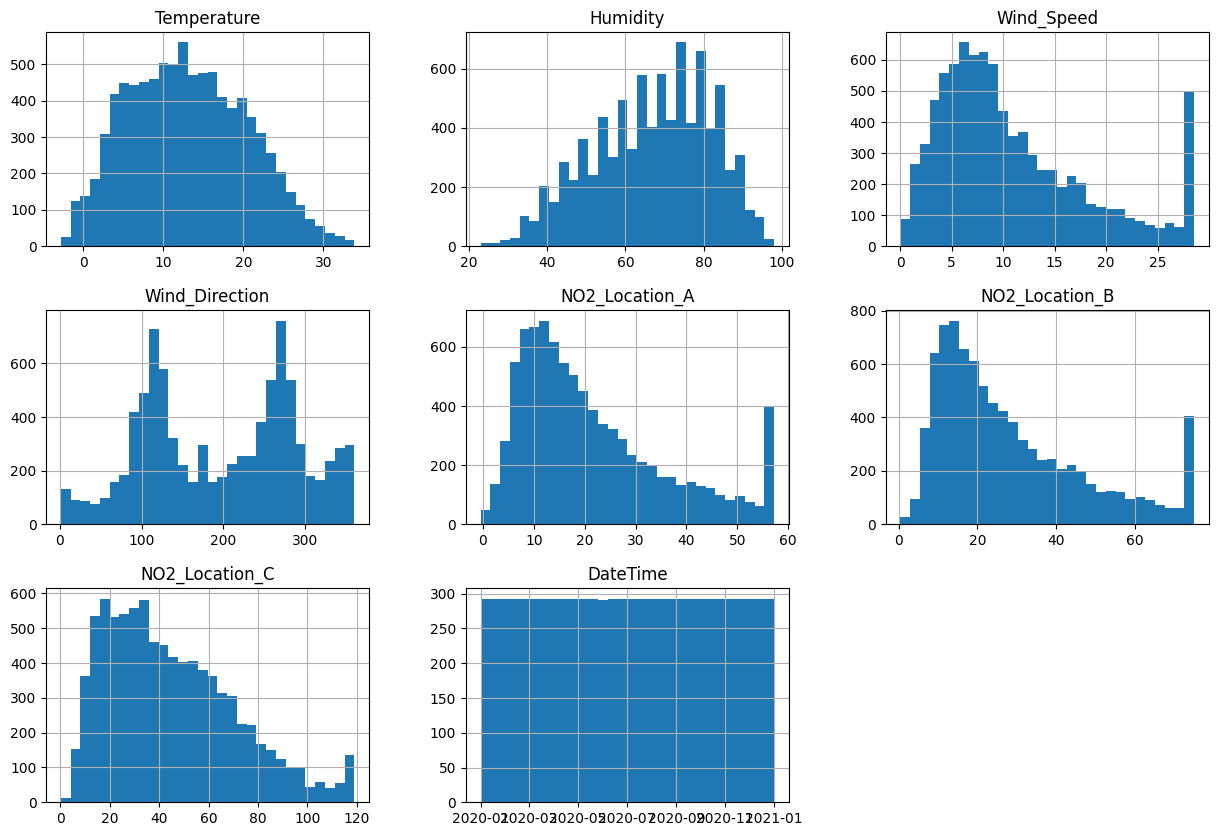

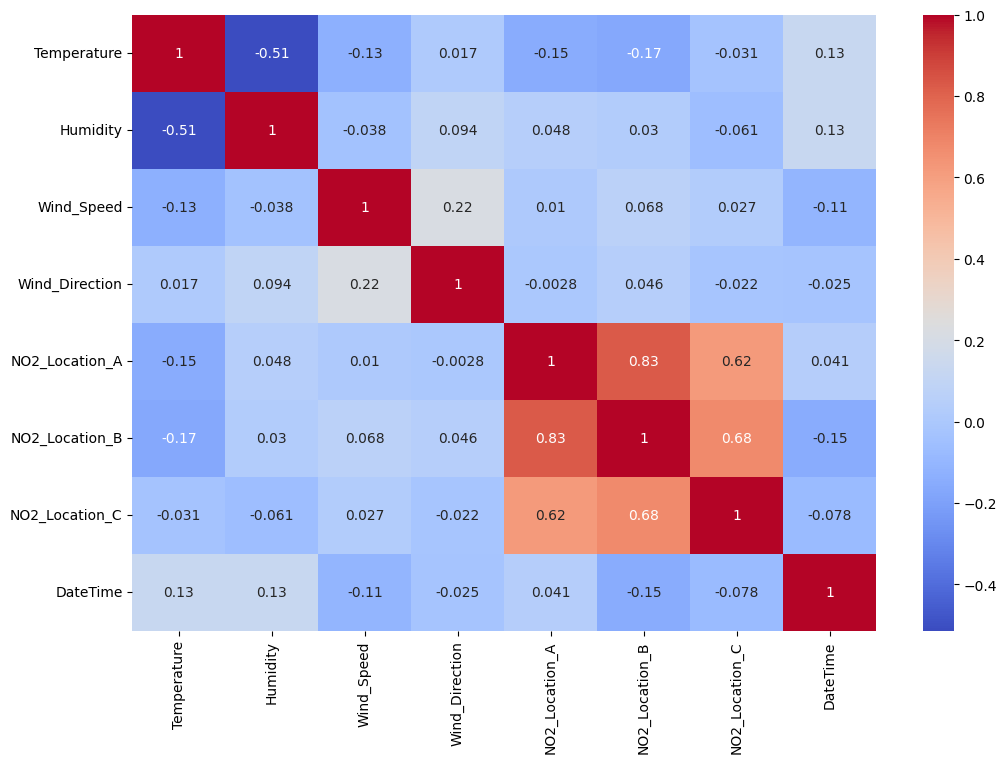

In [70]:
df = gf
df['DateTime'] = pd.to_datetime(df['DateTime'])
# Checking the distribution of each column
df.hist(bins=30, figsize=(15, 10))

# Checking the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Plotting the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

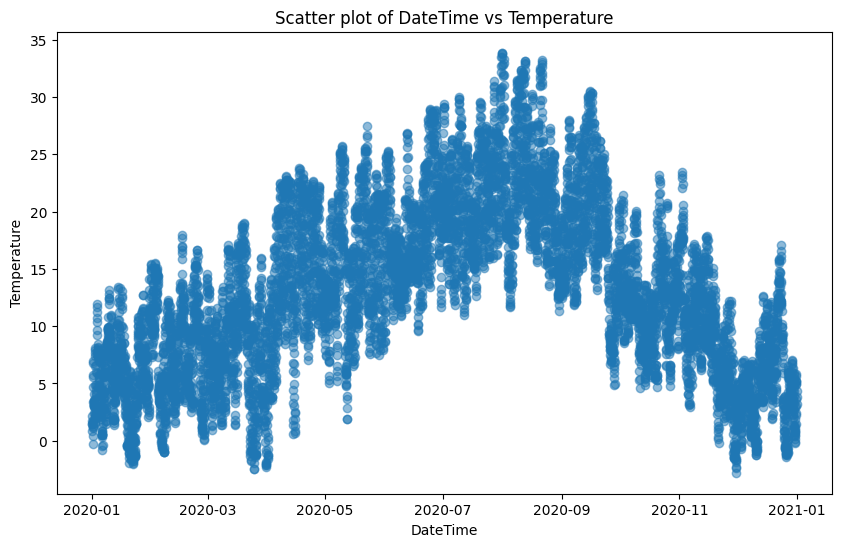

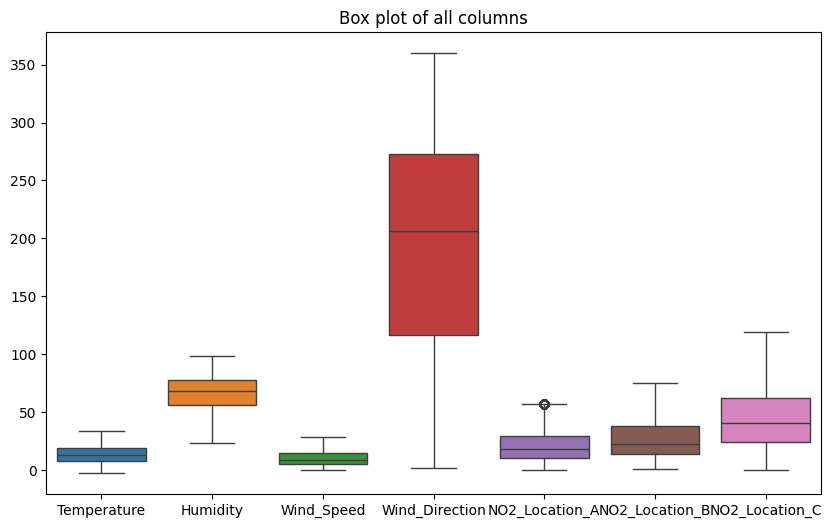

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(df['DateTime'], df['Temperature'], alpha=0.5)
plt.title('Scatter plot of DateTime vs Temperature')
plt.xlabel('DateTime')
plt.ylabel('Temperature')
plt.show()

# Box plot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plot of all columns')
plt.show()